# 02 - PCA
**Last Updated: 2022/04/03** <br>
**Read in the 4 database excel files and perform PCA on them**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read in the database files
cleaned_df = pd.read_excel("./02-Cleaned_Dataset.xlsx")
anno2_p = pd.read_excel("./02-anno2_p.xlsx")
anno2_r = pd.read_excel("./02-anno2_r.xlsx")
anno3 = pd.read_excel("./02-anno3.xlsx")

## Cleaned DataFrame

In [3]:
#Fill in the NaN values on the cleaned(original) dataframe. OneHotEncoder cannot take NaN as input
emotion_cols = ['r1_e', 'r2_e', 'p1_e', 'p2_e', 'p3_e', 'p4_e', 'p5_e', 'p6_e']
intensity_cols = ['r1_i', 'r2_i', 'p1_i', 'p2_i', 'p3_i', 'p4_i', 'p5_i', 'p6_i']

cleaned_df[emotion_cols] = cleaned_df[emotion_cols].fillna('NoClassification')
cleaned_df[intensity_cols] = cleaned_df[intensity_cols].fillna(0)
#cleaned_df[intensity_cols] = cleaned_df[intensity_cols].fillna(2.5)

#cleaned_df

### OneHotEncoding

In [5]:
#OneHotEncode the emotion
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

model_OHE = ColumnTransformer([('One-Hot', OneHotEncoder(), emotion_cols)], remainder='passthrough')
transformed_df = model_OHE.fit_transform(cleaned_df[['ori_i', 'r1_e', 'r2_e', 'p1_e', 'p2_e', 'p3_e', 'p4_e', 'p5_e', 'p6_e',
                                            'r1_i', 'r2_i', 'p1_i', 'p2_i', 'p3_i', 'p4_i', 'p5_i', 'p6_i']])
#transformed_df = model_OHE.fit_transform(df[['ori_i', 'r1_e', 'r2_e', 'p1_e', 'p2_e', 'p3_e', 'p4_e', 'p5_e', 'p6_e']])

In [6]:
transformed_df

<274x72 sparse matrix of type '<class 'numpy.float64'>'
	with 3502 stored elements in Compressed Sparse Row format>

### PCA

In [ ]:
"""
#For when transformed_df is NOT sparse (ex: halving the dataset in cell3)
from sklearn.decomposition import PCA
#PCA in 2 dimensions
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(transformed_df)

principalDf = pd.DataFrame(data = principalComponents, columns=['pc 1', 'pc 2'])
principalDf
"""

In [7]:
from sklearn.decomposition import SparsePCA

pca2 = SparsePCA(n_components=2)
principalComponents = pca2.fit_transform(transformed_df.todense())

principalDf = pd.DataFrame(data = principalComponents, columns=['pc 1', 'pc 2'])
principalDf

,pc 1,pc 2
0,-4.519000,-1.669178
1,-5.071358,-1.762803
2,-5.369084,-0.591996
3,-5.911576,0.918304
4,-5.815601,1.028033
...,...,...
269,3.255636,-2.804586
270,3.024841,-3.257524
271,1.719123,-4.176991
272,3.509519,-2.300860


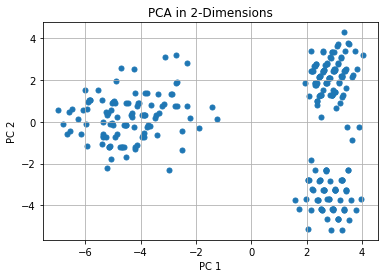

In [10]:
plt.title("PCA in 2-Dimensions")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid()

plt.scatter(x=principalDf['pc 1'], y=principalDf['pc 2'], s=25)
plt.show()

## Anno2 - Participants

### OneHotEncoding

In [ ]:
principalDf['Tweet'] = df['Tweet']
left_half = principalDf[principalDf['pc 1'] < 0]
right_half = principalDf[principalDf['pc 1'] > 0]

In [ ]:
pd.options.display.max_rows = 999
display(left_half)
pd.options.display.max_rows = 10

In [ ]:
right_half = right_half.sort_values(by=['pc 2'])

pd.options.display.max_rows = 999
display(right_half)
pd.options.display.max_rows = 10

In [ ]:
principalDf

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

principalDf = principalDf.drop("Tweet", axis=1)

# K-Means Clustering for various K
max_clusters = 10
silhouette_scores = []

for i in range(2, max_clusters):
    kmeans = KMeans(n_clusters=i, random_state=27)
    kmeans.fit(principalDf)
    score = silhouette_score(principalDf, kmeans.labels_)
    silhouette_scores.append(score)

# Plot out the silhouette scores vs the number of clusters, K
plt.xticks(range(2, max_clusters))
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()

plt.plot(range(2, max_clusters), silhouette_scores)
print('Silhouette Scores: ', silhouette_scores)

In [ ]:
K = 3 #optimal K, from part2
model = KMeans(n_clusters=K, random_state=27)
model.fit(principalDf)

plt.title("PCA in 2-Dimensions")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid()

#Colouring code referenced from: https://stackoverflow.com/a/28232401
label_colour_map = {0: 'r', 1:'b', 2:'g'}
                    #, 3:'purple', 4:'black'}
label_colour = [label_colour_map[i] for i in model.labels_]

plt.scatter(principalDf['pc 1'], principalDf['pc 2'], s=25, c=label_colour)
plt.show()